# Example Code

In [ ]:
#@title
# Import the packages and classes needed for this example:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


# Let's look at some data!


## Download and do some data manipulation

In [ ]:
#@title
import pandas as pd
df = pd.read_csv("https://busan302.mycourses.work/data/mtcars.csv" )
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [ ]:
#@title
# Take just the columns we're interested in working with
sdf = df[["mpg","cyl","disp"]]
sdf = sdf.dropna(axis=0 ) # remove rows with any NAs
sdf.describe()

,mpg,cyl,disp
count,32.000000,32.000000,32.000000
mean,20.090625,6.187500,230.721875
std,6.026948,1.785922,123.938694
min,10.400000,4.000000,71.100000
25%,15.425000,4.000000,120.825000
50%,19.200000,6.000000,196.300000
75%,22.800000,8.000000,326.000000
max,33.900000,8.000000,472.000000


In [ ]:
#@title
# Dependent variable
y = sdf[["mpg"]]
y.head() 

,mpg
0,21.0
1,21.0
2,22.8
3,21.4
4,18.7


In [ ]:
#@title
# Independent variables
x = sdf[["cyl","disp"]]
x.head()

,cyl,disp
0,6,160.0
1,6,160.0
2,4,108.0
3,6,258.0
4,8,360.0


In [ ]:
#@title
# We use statsmodels library to print out the results nicely.
# There are two ways to use it.
import statsmodels.api as sm
x = sm.add_constant(x)
m = sm.OLS(y, x).fit() # here we fit our model using our x and y data defined above
print(m.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     45.81
Date:                Thu, 18 Aug 2022   Prob (F-statistic):           1.06e-09
Time:                        04:54:06   Log-Likelihood:                -79.573
No. Observations:                  32   AIC:                             165.1
Df Residuals:                      29   BIC:                             169.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.6610      2.547     13.609      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


### Other ways to use the statsmodels library
The statsmodels library is slightly easier to use and the output is formatted nicely. The results between methods are the same, however.

In [ ]:
#@title
import statsmodels.formula.api as smf  # Different library
# In my opinion, this format is easier to use
# You just need to write the equation y ~ x's and specify the dataframe you're using as data
model = smf.ols( formula="mpg ~ cyl + disp" , data = df)
results = model.fit()
print(results.summary())
# The results are the same!

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     45.81
Date:                Thu, 18 Aug 2022   Prob (F-statistic):           1.06e-09
Time:                        04:54:23   Log-Likelihood:                -79.573
No. Observations:                  32   AIC:                             165.1
Df Residuals:                      29   BIC:                             169.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.6610      2.547     13.609      0.0

### Matrix scatter plot
Plot a matrix of the variables in the data. The scatter_matrix function shows scatter plots of each variable and the relationships between them. Along the diagnol is a histogram. This is a great way to quickly visualize the relationships between variables.

Notice that we use the smaller dataframe (sdf) for this example. There are too many variables in the data to add them all to a single matrix!

Follow the [link to read more about scatter_matrix](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.plotting.scatter_matrix.html?highlight=scatter_matrix).

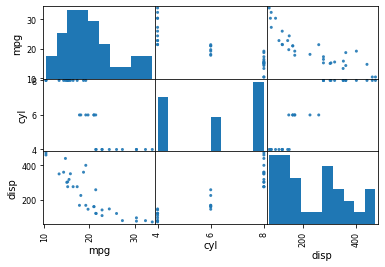

In [ ]:
#@title
from pandas.plotting import scatter_matrix
sm = scatter_matrix( sdf, alpha = .9, diagonal = 'hist' )

## Correlations between variables
You can find out more about the pandas [correlation function in the documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html).

In [ ]:
#@title
sdf.corr()

,mpg,cyl,disp
mpg,1.000000,-0.852162,-0.847551
cyl,-0.852162,1.000000,0.902033
disp,-0.847551,0.902033,1.000000


In [ ]:
#@title
from scipy.stats import pearsonr
import numpy as np

# A slightly complicated way to get the significance of the correlation using stars
# A star for each of 1%, 5%, and 10% level
def get_corr( mydf, digits=2 ):
    rho = sdf.corr()
    pval = sdf.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
    p = pval.applymap(lambda x: ''.join(['*' for t in [0.01,0.05,0.1] if x<=t]))
    return rho.round(digits).astype(str) + p

get_corr(sdf,3)

,mpg,cyl,disp
mpg,1.0***,-0.852***,-0.848***
cyl,-0.852***,1.0***,0.902***
disp,-0.848***,0.902***,1.0***


In [ ]:
#@title
#import statsmodels.stats.descriptivestats as ds
#ds.Describe(x)
#desc = ds.Describe(x)
#desc
x.describe()

,const,cyl,disp
count,32.0,32.000000,32.000000
mean,1.0,6.187500,230.721875
std,0.0,1.785922,123.938694
min,1.0,4.000000,71.100000
25%,1.0,4.000000,120.825000
50%,1.0,6.000000,196.300000
75%,1.0,8.000000,326.000000
max,1.0,8.000000,472.000000


# Descriptive statistics
To find out more, see the [manual page for describe](https://www.statsmodels.org/stable/generated/statsmodels.stats.descriptivestats.describe.html)